# Basit Doğrusal Regresyon (Simple Linear Regression)

Basit doğrusal regresyon, iki sürekli (nicel) değişken arasındaki ilişkileri özetlememize ve incelememize izin veren istatistiksel bir yöntemdir. Basit doğrusal regresyon, yalnızca bir bağımsız değişkenin incelenmesiyle ilgili olduğu için sıfatını "basit" alır. Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonsiyonu bulmaktır.

\begin{gather*}
\huge  Y = \beta_0 + \beta_1X \\ \\
\large Y: Bağımlı\,Değişken \quad X: Bağımsız\,Değişken \\
\end{gather*}

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

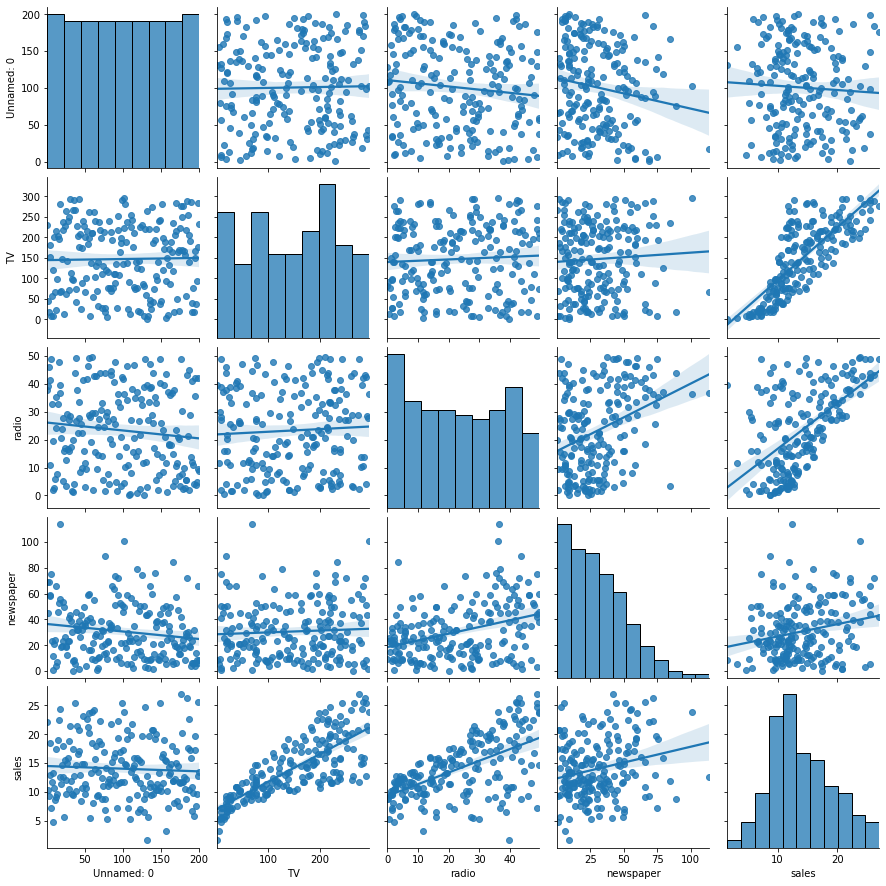

In [4]:
import seaborn as sns
sns.pairplot(df, kind='reg');

#### Doğrusal Regresyon nasıl çalışır?

Cebirde "doğrusallık" terimi, iki veya daha fazla değişken arasındaki doğrusal bir ilişkiyi ifade eder. Bu ilişkiyi iki boyutlu bir uzayda (iki değişken arasında) çizersek, düz bir çizgi elde ederiz. Bağımsız değişkeni (x) x ekseninde ve bağımlı değişkeni (y) y ekseninde çizersek, doğrusal regresyon bize veri noktalarına "en iyi uyan" düz bir çizgi verir. düz bir çizgi, böylece en uygun çizgiyi kullanırsınız. Bu doğrunun denklemi, basit doğrusal regresyonunuzun sonucu olacaktır. Yani regresyon en uygun çizgiyi bulur.

#### En uygun çizgiyi nasıl bulabiliriz?

X ve Y değerleri sabit kalacağından, yalnızca $\beta_0$ ve $\beta_1$'i değiştirebiliriz. Amacımız, bu verilere en iyi uyacak $\beta_0$ ve $\beta_1$ değerlerini bulmaktır. Bu 2 katsayıya aslında hiperparametreler denir. Makine öğrenmesinde, hiperparametre, değeri öğrenme sürecini kontrol etmek için kullanılan bir parametredir. Ve bir makine öğrenimi modeli oluştururken her zaman en uygun parametreleri bulmaya çalışmalıyız.

$ \beta_0 $ = Doğrunun y eksenini kestiği  nokta

$ \beta_1 $ = Doğrunun eğimi

${ Y = \beta_0 + \beta_1X + \epsilon}$ -> Anakitle teorik gösterimi

${ y_i = b_0 + b_1x_i + e_i}$  -> Örneklem teorik gösterimi

${ ŷ_i = b_0 + b_1x_i }$ -> Tahmin fonksiyonu

$ { \epsilon_i = y_i - ŷ_i}$ -> ${ \epsilon_i = y_i - b_0 + b_1 x_i }$ -> Hatalar/artıklar

$ SSE = { {\sum_{(i=1)}^n} (y_i - ŷ_i)^2 }$
 
$   \epsilon $ = tahmin hatası (veya artık hata)


In [5]:
X = df[["TV"]]
y = df["sales"]

In [6]:
# statsmodels ile modelleme
import statsmodels.api as sm
X = sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 01 May 2021   Prob (F-statistic):           1.47e-42
Time:                        14:10:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [9]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [10]:
print("f_pvalue", "%.3f" % model.f_pvalue)

f_pvalue 0.000


In [11]:
print("fvalue", "%.3f" % model.fvalue)

fvalue 312.145


In [12]:
model.mse_model

3314.618166868649

In [13]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [14]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [15]:
print("Sales = " + str("%.2f" % model.params[0]) + " + TV*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


C:\Users\Seda Kayademir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


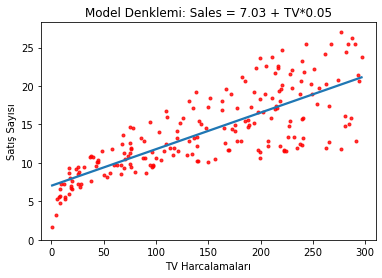

In [16]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcalamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [17]:
X = df[["TV"]]
y = df["sales"]

# Veri setini eğitim verisi ve test verisi olarak ikiye böleceğiz. Buradaki amacımız modelimizi test etmek.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [18]:
# y eksenini kestiği nokta 
print("Beta0", linear_regressor.intercept_)

# x'in katsayısı
print("Beta1:", linear_regressor.coef_)

Beta0 7.032593549127693
Beta1: [0.04753664]


In [19]:
# 170 birim TV harcaması olduğunda satışların değeri nedir?
y = linear_regressor.intercept_ + linear_regressor.coef_ * 170
print(y)

[15.11382242]


In [20]:
# Şimdi bunu modelimize tahmin ettirelim
linear_regressor.predict([[170]])

array([15.11382242])

In [21]:
# Şimdi test verimiz için tahmin işlemini gerçekleştirelim
y_pred = linear_regressor.predict(X_test)

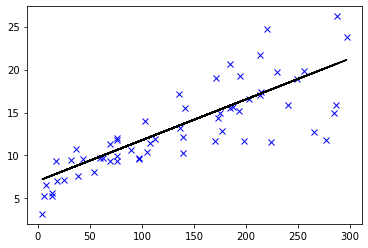

In [22]:
plt.plot(X_test, y_test,'bx')
plt.plot(X_test, y_pred, color='black')
plt.show()

Doğrusal modelleri değerlendirmek için kullanılan üç ana ölçüm vardır. Bunlar: Ortalama mutlak hata (MAE), Ortalama hata karesi (MSE) veya Ortalama karesel hata (RMSE).

In [23]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.171897232573824
MSE: 8.603581489754449
RMSE: 2.9331862350956253


# Çoklu Doğrusal Regresyon (Multiple Linear Regression)

Basit doğrusal regresyondan farkı ikiden fazla sürekli (nicel) değişken arasındaki ilişkileri özetlememize ve incelememize izin veren istatistiksel bir yöntem olmasıdır. Temel amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonsiyonu bulmaktır.

Doğrusal Regresyonun Varsayımları

* Hatalar normal dağılır.
* Hatalar birbirinden bağımsızdır ve aralarında otokorelasyon yoktur.
* Her bir gözlem için hata terimleri varyansları sabittir.
* Değişkenler ile hata terimi arasında ilişki yoktur.
* Bağımsız değişkenler arasında çoklu doğrusal ilişki problemi yoktur.


Regresyon Modellerinin Avantajları

* İyi anlaşılırsa diğer tüm ML ve DL konuları rahat kavranır.
* Doğrusallık nedensellik yorumları yapılabilmesini sağlar, bu durum aksiyoner ve stratejik modelleme imkanı verir.
* Değişkenlerin etki düzeyleri ve anlamlılıkları değerlendirilebilir.
* Bağımlı değişkendeki değişkenliğin açıklanma başarısı ölçülebilir.
* Model anlamlılığı değerlendirilebilir.

Regresyon Modellerinin Dezavantajları

* Varsayımları vardır.
* Aykırı gözlemlere duyarlıdır.

In [24]:
X = df.drop("sales", axis=1)
y = df["sales"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [26]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              2349.
Date:                Sat, 01 May 2021   Prob (F-statistic):                   2.12e-124
Time:                        14:10:23   Log-Likelihood:                         -283.62
No. Observations:                 140   AIC:                                      575.2
Df Residuals:                     136   BIC:                                      587.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Unnamed: 0     0.0082      0.002      3.858      0.000       0.004       0.012
TV             0.0516      0.002     32.604      0.000       0.048       0.055
radio          0.2096      0.010     20.433      0.000       0.189       0.230
newspaper      0.0138      0.007      1.878      0.062      -0.001       0.028
==============================================================================
Omnibus:                       19.232   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.395
Skew:                          -0.636   Prob(JB):                     3.40e-08
Kurtosis:                       5.069   Cond. No.                         14.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [29]:
model.intercept_

2.5391864292526005

In [30]:
model.coef_

array([0.00046136, 0.04714165, 0.19106595, 0.00023253])

In [31]:
# prediction
y_pred = model.predict(X_test)

In [32]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.2680003306103322
MSE: 2.7246284259390325
RMSE: 1.6506448515471257


#### Model Tuning / Model Doğrulama

In [33]:
model.score(X_train, y_train)

0.8970727890666049

In [34]:
from sklearn.model_selection import cross_val_predict, cross_val_score
cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()

0.8892691469937937

In [35]:
cross_val_score(model, X_test, y_test, cv=10, scoring="r2").mean()

0.8063521647074866

In [36]:
np.sqrt(-cross_val_score(model, 
                         X_train, 
                         y_train, 
                         cv=10, 
                         scoring="neg_mean_squared_error")).mean()

1.7033304273439516

In [37]:
np.sqrt(-cross_val_score(model, 
                         X_test, 
                         y_test, 
                         cv=10, 
                         scoring="neg_mean_squared_error")).mean()

1.6840964458496852

## Kaynaklar

### Websiteleri
* https://online.stat.psu.edu/stat501/lesson/1/1.1

### Kurslar
* https://dphi.tech/lms/learn/supervised-learning-regression/537
* https://www.udemy.com/course/python-egitimi/